# top10 AUC (1kb)

In [14]:
import os
import subprocess
import gzip
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# top 10 kmer

In [2]:
auc_df_dict = {}
for process1, process2 in [
    ['Universal', 'nonUniversal', ],
    ['Universal', 'NonCHM', ],
    ['nonUniversal', 'NonCHM']
                    ] :
    auc_df = pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/AUC_1kb/AUC_{process1}_vs_{process2}_rmDup_bothSide.tsv',
                        sep = "\t", header = 0).sort_values(['bothside_AUC'], ascending = False)
    auc_df_dict[f'{process1}_{process2}'] = auc_df
    print(f'{process1}_{process2}')
    print(auc_df.head(10))
    print()
# auc_df = pd.read_csv('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/AUC_1kb/AUC_Universal_vs_NonCHM_rmDup_bothSide.tsv',
#                     sep = "\t", header = 0).sort_values(['bothside_AUC'], ascending = False)
# auc_df.head(10)

Universal_nonUniversal
    kmer       AUC      opos  bothside_AUC
0    CAC  0.122327  0.877673      0.877673
1    AAT  0.860171  0.139829      0.860171
2   CACC  0.142338  0.857662      0.857662
3  GTAAA  0.849357  0.150643      0.849357
4   AAAG  0.844517  0.155483      0.844517
5  AAAAG  0.841669  0.158331      0.841669
6  AGAAT  0.836489  0.163511      0.836489
7   CAAA  0.836047  0.163953      0.836047
8   ATTC  0.835291  0.164709      0.835291
9  AAAGA  0.831081  0.168919      0.831081

Universal_NonCHM
    kmer       AUC      opos  bothside_AUC
0    AGA  0.891844  0.108156      0.891844
1    CAC  0.121723  0.878277      0.878277
2    AAG  0.873490  0.126510      0.873490
3   CACC  0.127962  0.872038      0.872038
4  GTAAA  0.870612  0.129388      0.870612
5   AAAG  0.856611  0.143389      0.856611
6    CCC  0.148295  0.851705      0.851705
7  ATTAG  0.850554  0.149446      0.850554
8   ATTC  0.849793  0.150207      0.849793
9  ATCAG  0.847972  0.152028      0.847972

nonUniversal

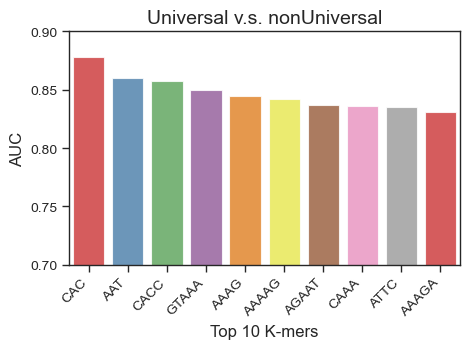

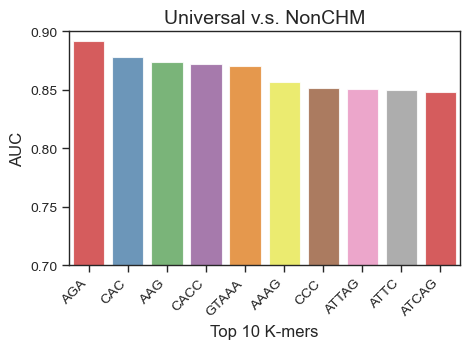

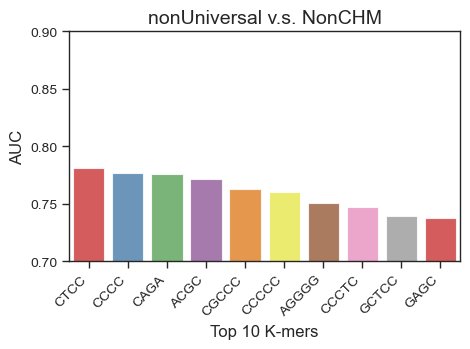

In [7]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process1, process2 in [
        ['Universal', 'nonUniversal', ],
        ['Universal', 'NonCHM', ],
        ['nonUniversal', 'NonCHM']
                        ] :        
        auc_df = auc_df_dict[f'{process1}_{process2}']
        fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * .75), tight_layout = True)
        sns.barplot(data = auc_df.head(10),
                    x = 'kmer',
                    y = 'bothside_AUC', 
                    palette = 'Set1',
                    alpha = 0.8,
                    orient = 'v')
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
        ax.set_ylim(0.7,.9)
    #     ax.set_xscale('log')
        ax.set_xlabel("Top 10 K-mers")
        ax.set_ylabel('AUC')
        # ax.set_ylim(-0.01, 1.01)
        ax.set_title(f'{process1} v.s. {process2}')
        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_bar_AUC_top10Kmer_1kb_{process1}_{process2}.pdf',transparent=True)
        


# frequency per kb

In [8]:
kmer_freq_df_dict = {}
for process1, process2 in [
        ['Universal', 'nonUniversal', ],
        ['Universal', 'NonCHM', ],
        ['nonUniversal', 'NonCHM']] :
    process1_l = process1 if process1 == 'Universal' else 'Universal_complementarySet' if process1 == 'nonUniversal' else 'NonCHMsCpGrich'
    process2_l = process2 if process2 == 'Universal' else 'Universal_complementarySet' if process2 == 'nonUniversal' else 'NonCHMsCpGrich'
    
    kmer_freq_df = pd.concat([
        pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/AUC_1kb/{process1_l}_kmer_frequency.tsv', 
                        sep = "\t"),
        pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/AUC_1kb/{process2_l}_kmer_frequency.tsv', 
                        sep = "\t"),]
    ).fillna(0)
    kmer_freq_df_dict[f'{process1}_{process2}'] = kmer_freq_df
    
kmer_freq_df_dict

{'Universal_nonUniversal':                   CHM_name        A       AA     AAA     AAAA   AAAAA   
 0              Universal_1  0.20425  0.04950  0.0110  0.00700  0.0000  \
 1             Universal_10  0.27500  0.09150  0.0350  0.01050  0.0025   
 2            Universal_100  0.25375  0.07875  0.0230  0.00775  0.0025   
 3           Universal_1000  0.18775  0.03050  0.0000  0.00000  0.0000   
 4           Universal_1001  0.25900  0.08650  0.0300  0.01000  0.0030   
 ...                    ...      ...      ...     ...      ...     ...   
 2043  nonUniversalCHM_9938  0.19150  0.03100  0.0005  0.00000  0.0000   
 2044  nonUniversalCHM_9939  0.24100  0.06350  0.0200  0.01000  0.0045   
 2045  nonUniversalCHM_9951  0.25600  0.07450  0.0225  0.00600  0.0020   
 2046  nonUniversalCHM_9954  0.20100  0.03700  0.0055  0.00250  0.0010   
 2047  nonUniversalCHM_9999  0.20600  0.04050  0.0000  0.00000  0.0000   
 
        AAAAAA  AAAAAC  AAAAAG  AAAAAT  ...   TTTTG  TTTTGA  TTTTGC  TTTTGG   
 0   

In [9]:
kmer_freq_df_top10_dict = {}
for process1, process2 in [
        ['Universal', 'nonUniversal', ],
        ['Universal', 'NonCHM', ],
        ['nonUniversal', 'NonCHM']] :
    auc_df = auc_df_dict[f'{process1}_{process2}']
    kmer_freq_df = kmer_freq_df_dict[f'{process1}_{process2}']
    kmer_freq_df_top10 = kmer_freq_df[['CHM_name'] + auc_df.head(10)['kmer'].tolist()]
    kmer_freq_df_top10['Class'] = kmer_freq_df_top10['CHM_name'].str.split('_', expand = True)[0]
    kmer_freq_df_top10 = kmer_freq_df_top10.melt(id_vars = ['CHM_name', 'Class'])
    kmer_freq_df_top10['frequency_per_kb'] = kmer_freq_df_top10['value'] * 1000
    kmer_freq_df_top10_dict[f'{process1}_{process2}'] = kmer_freq_df_top10
    print([f'{process1}_{process2}'])
    print(kmer_freq_df_top10.head())
    print()

# kmer_freq_df_top10 = kmer_freq_df[['CHM_name'] + auc_df.head(10)['kmer'].tolist()]
# kmer_freq_df_top10['Class'] = kmer_freq_df_top10['CHM_name'].str.split('_', expand = True)[0]
# kmer_freq_df_top10 = kmer_freq_df_top10.melt(id_vars = ['CHM_name', 'Class'])
# kmer_freq_df_top10['frequency_per_kb'] = kmer_freq_df_top10['value'] * 1000
# kmer_freq_df_top10

['Universal_nonUniversal']
         CHM_name      Class variable    value  frequency_per_kb
0     Universal_1  Universal      CAC  0.01700             17.00
1    Universal_10  Universal      CAC  0.01650             16.50
2   Universal_100  Universal      CAC  0.01050             10.50
3  Universal_1000  Universal      CAC  0.02225             22.25
4  Universal_1001  Universal      CAC  0.01150             11.50

['Universal_NonCHM']
         CHM_name      Class variable    value  frequency_per_kb
0     Universal_1  Universal      AGA  0.02225             22.25
1    Universal_10  Universal      AGA  0.02150             21.50
2   Universal_100  Universal      AGA  0.02950             29.50
3  Universal_1000  Universal      AGA  0.01600             16.00
4  Universal_1001  Universal      AGA  0.01850             18.50

['nonUniversal_NonCHM']
                CHM_name            Class variable     value  frequency_per_kb
0     nonUniversalCHM_10  nonUniversalCHM     CTCC  0.002000       

/tmp/ipykernel_89225/3972042773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmer_freq_df_top10['Class'] = kmer_freq_df_top10['CHM_name'].str.split('_', expand = True)[0]
/tmp/ipykernel_89225/3972042773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmer_freq_df_top10['Class'] = kmer_freq_df_top10['CHM_name'].str.split('_', expand = True)[0]
/tmp/ipykernel_89225/3972042773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [10]:
kmer_freq_df_top10

,CHM_name,Class,variable,value,frequency_per_kb
0,nonUniversalCHM_10,nonUniversalCHM,CTCC,0.002000,2.000
1,nonUniversalCHM_10048,nonUniversalCHM,CTCC,0.006875,6.875
2,nonUniversalCHM_1005,nonUniversalCHM,CTCC,0.004000,4.000
3,nonUniversalCHM_10050,nonUniversalCHM,CTCC,0.003500,3.500
4,nonUniversalCHM_10056,nonUniversalCHM,CTCC,0.004500,4.500
...,...,...,...,...,...
241165,nonCHM_9995,nonCHM,GAGC,0.011000,11.000
241166,nonCHM_9996,nonCHM,GAGC,0.005500,5.500
241167,nonCHM_9997,nonCHM,GAGC,0.010000,10.000
241168,nonCHM_9998,nonCHM,GAGC,0.004500,4.500


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AAAGA_Universal v.s. AAAGA_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.447e-303 U_stat=3.484e+06
ATTC_Universal v.s. ATTC_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.467e-302 U_stat=3.502e+06
AAT_Universal v.s. AAT_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.606e+06
CAC_Universal v.s. CAC_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=5.128e+05
CACC_Universal v.s. CACC_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=5.967e+05
GTAAA_Universal v.s. GTAAA_nonUniversalCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.56

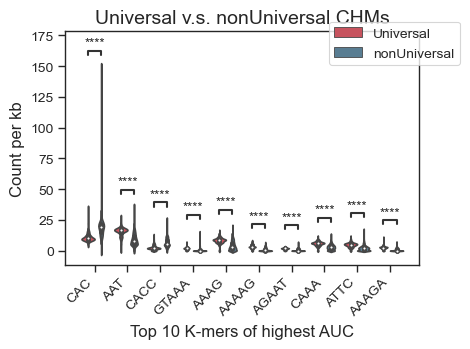

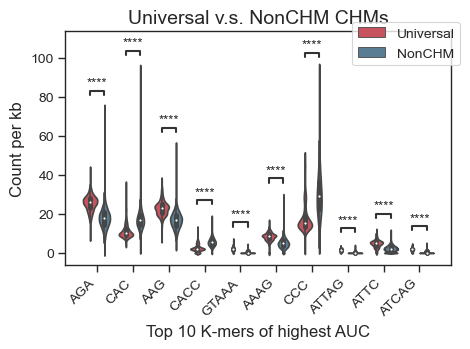

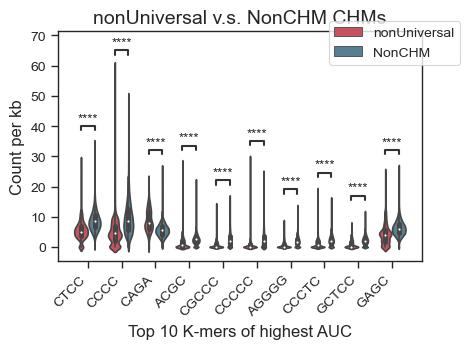

In [15]:
from statannot import add_stat_annotation
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process1, process2 in [
            ['Universal', 'nonUniversal', ],
            ['Universal', 'NonCHM', ],
            ['nonUniversal', 'NonCHM']] :
        kmer_freq_df_top10 = kmer_freq_df_top10_dict[f'{process1}_{process2}']
        fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * .75), tight_layout = True)
        sns.violinplot(data = kmer_freq_df_top10,
                    x = 'variable',
                    y = 'frequency_per_kb',
                    hue = 'Class',
                    ax = ax,
                    palette = ['#DA404E', '#507F9B']
                    )
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
        # ax.set_title(f'{kmer} count')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("Top 10 K-mers of highest AUC")
        ax.set_title(f'{process1} v.s. {process2} CHMs')
        
        h,l = ax.get_legend_handles_labels()
        ax.legend(h, [f'{process1}', f'{process2}'], title = '', loc = 'lower left', bbox_to_anchor = (.725, 0.825))
        
        process1_m = process1 if process1 == 'Universal' else 'nonUniversalCHM' if process1 == 'nonUniversal' else 'nonCHM'
        process2_m = process2 if process2 == 'Universal' else 'nonUniversalCHM' if process2 == 'nonUniversal' else 'nonCHM'
    
        add_stat_annotation(ax, data=kmer_freq_df_top10, x='variable', y='frequency_per_kb', hue = 'Class',
                            box_pairs=[((x.get_text(), process1_m), (x.get_text(), process2_m)) for x in ax.get_xticklabels()],
                            test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_KmerTop10AUC_freq_1kb_{process1}_{process2}.pdf', transparent = True)
            

# existing percentage (not used)

In [10]:
kmer_freq_df_top10[kmer_freq_df_top10['Class'] == 'Universal']

,CHM_name,Class,variable,value,frequency_per_kb
0,Universal_1,Universal,AGA,0.02225,22.25
1,Universal_10,Universal,AGA,0.02150,21.50
2,Universal_100,Universal,AGA,0.02950,29.50
3,Universal_1000,Universal,AGA,0.01600,16.00
4,Universal_1001,Universal,AGA,0.01850,18.50
...,...,...,...,...,...
219086,Universal_993,Universal,ATCAG,0.00200,2.00
219087,Universal_994,Universal,ATCAG,0.00150,1.50
219088,Universal_995,Universal,ATCAG,0.00150,1.50
219089,Universal_997,Universal,ATCAG,0.00150,1.50


In [11]:
kmer_exist_df_top10 = kmer_freq_df_top10.copy()
kmer_exist_df_top10['exist'] = (kmer_exist_df_top10['value'] > 0).astype(int)
kmer_exist_df_top10 = kmer_exist_df_top10.groupby(['Class', 'variable']).mean().reset_index()
kmer_exist_df_top10

,Class,variable,value,frequency_per_kb,exist
0,Universal,AAAG,0.008169,8.168576,0.976551
1,Universal,AAG,0.022944,22.943935,1.000000
2,Universal,AGA,0.025647,25.646808,1.000000
3,Universal,ATCAG,0.001679,1.678637,0.878359
4,Universal,ATTAG,0.001381,1.380622,0.828041
5,Universal,ATTC,0.004730,4.730024,0.976063
6,Universal,CAC,0.011267,11.266781,1.000000
7,Universal,CACC,0.002494,2.494354,0.857841
8,Universal,CCC,0.017894,17.894251,1.000000
9,Universal,GTAAA,0.001867,1.866895,0.891060


In [12]:
kmer_order_dict = auc_df.head(10).reset_index()[['index', 'kmer']]
kmer_order_dict

,index,kmer
0,0,AGA
1,1,CAC
2,2,AAG
3,3,CACC
4,4,GTAAA
5,5,AAAG
6,6,CCC
7,7,ATTAG
8,8,ATTC
9,9,ATCAG


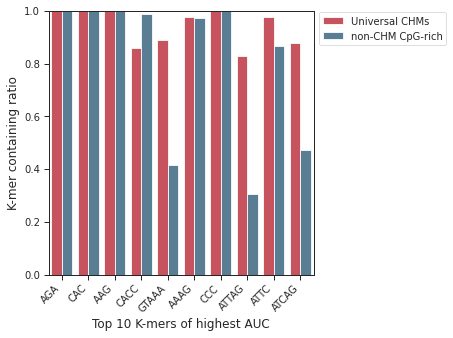

In [13]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
    plot_df = pd.merge(kmer_exist_df_top10, kmer_order_dict, left_on = 'variable', right_on = 'kmer').sort_values(['index', 'exist'], ascending=[True, False])
    sns.barplot(data = plot_df,
                x = 'kmer',
                y = 'exist', 
                hue = 'Class',
                palette = ['#DA404E', '#507F9B'],
                orient = 'v')
    h,l = ax.get_legend_handles_labels()
    ax.legend(h, ['Universal CHMs', 'non-CHM CpG-rich'], title = '', loc = 'lower left', bbox_to_anchor = (1, 0.85))
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    ax.set_ylim(0,1)
#     ax.set_xscale('log')
    ax.set_xlabel("Top 10 K-mers of highest AUC")
    ax.set_ylabel('K-mer containing ratio')
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_bar_kmerPercent_Universal_nonCHM_1kb.pdf',transparent=True)
     
